In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veri setini yükleme
data = pd.read_csv("car_evaluation.csv")  # Veri setinin dosya yolunu veri_seti.csv ile değiştirin
data.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [2]:
# Sütun başlıklarını değiştirme
data = data.rename(columns={'vhigh': 'AlışFiyatı'})
data = data.rename(columns={'vhigh.1': 'BakımMaliyeti'})
data = data.rename(columns={'2': 'KapıSayısı'})
data = data.rename(columns={'2.1': 'YolcuSayısı'})
data = data.rename(columns={'small': 'BagajBoyutu'})
data = data.rename(columns={'low': 'Konfor'})
data = data.rename(columns={'unacc': 'Karar'})

# Değerlerin eşleneceği sözlüğü oluşturma ve sütunların değerlerini yeniden eşleme
mapping = {'small': 0, 'med': 1, 'big': 2}
data['BagajBoyutu'] = data['BagajBoyutu'].map(mapping)

mapping2 = {'low': 0, 'med': 1, 'high': 2}
data['Konfor'] = data['Konfor'].map(mapping2)

mapping3 = {'low': 0, 'med': 1, 'high': 2,'vhigh':3}
data['BakımMaliyeti'] = data['BakımMaliyeti'].map(mapping3)

mapping4 = {'low': 0, 'med': 1, 'high': 2,'vhigh':3}
data['AlışFiyatı'] = data['AlışFiyatı'].map(mapping4)

mapping5 = {'2':2,'3':3,'4':4,'5more':5}
data['KapıSayısı'] = data['KapıSayısı'].map(mapping5)

mapping6 = {'2':2,'4':4,'more':5}
data['YolcuSayısı'] = data['YolcuSayısı'].map(mapping6)

mapping7 = {'unacc':0,'acc':1}
data['Karar'] = data['Karar'].map(mapping7)

# Veri setinin başlıklarını gösterme
print("Veri Seti Başlıkları:")
print(data.columns)




Veri Seti Başlıkları:
Index(['AlışFiyatı', 'BakımMaliyeti', 'KapıSayısı', 'YolcuSayısı',
       'BagajBoyutu', 'Konfor', 'Karar'],
      dtype='object')


In [3]:
# Veri setinin ilk birkaç satırını gösterme
print("\nVeri Setinin İlk Birkaç Satırı:")
data.head()


Veri Setinin İlk Birkaç Satırı:


,AlışFiyatı,BakımMaliyeti,KapıSayısı,YolcuSayısı,BagajBoyutu,Konfor,Karar
0,3,3,2,2,0,1,0.0
1,3,3,2,2,0,2,0.0
2,3,3,2,2,1,0,0.0
3,3,3,2,2,1,1,0.0
4,3,3,2,2,1,2,0.0


In [4]:
# Veri setinin temel istatistiksel bilgilerini gösterme
print("\nVeri Setinin Temel İstatistiksel Bilgileri:")
data.describe()


Veri Setinin Temel İstatistiksel Bilgileri:


,AlışFiyatı,BakımMaliyeti,KapıSayısı,YolcuSayısı,BagajBoyutu,Konfor,Karar
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1593.000000
mean,1.499131,1.499131,3.500869,3.667632,1.000579,1.000579,0.241055
std,1.118098,1.118098,1.118098,1.247296,0.816615,0.816615,0.427858
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,4.500000,5.000000,2.000000,2.000000,0.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,1.000000


In [5]:
# Veri setinin boyutunu kontrol etme
print("\nVeri Setinin Boyutu:")
data.shape


Veri Setinin Boyutu:


(1727, 7)

In [6]:
#Bu yöntem, veri setindeki herhangi bir satırda eksik bir değer varsa o satırı kaldırır.
data.dropna(inplace=True)
#Bu yöntem, NaN veya null değerlerini belirli bir değerle doldurur, burada sıfır ile doldurulmuştur. 
data.fillna(0, inplace=True)
data.head()

,AlışFiyatı,BakımMaliyeti,KapıSayısı,YolcuSayısı,BagajBoyutu,Konfor,Karar
0,3,3,2,2,0,1,0.0
1,3,3,2,2,0,2,0.0
2,3,3,2,2,1,0,0.0
3,3,3,2,2,1,1,0.0
4,3,3,2,2,1,2,0.0


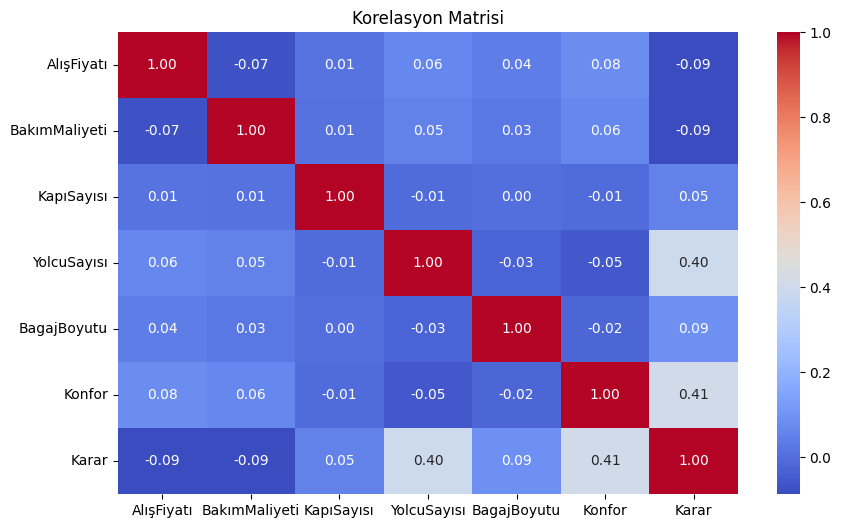

In [7]:
# Veri setinin özellikler arasındaki korelasyonunu görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

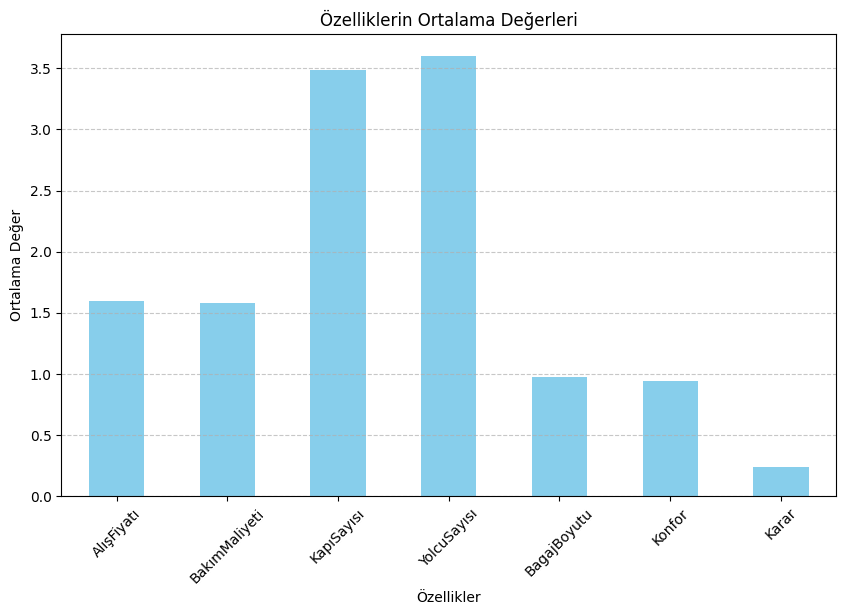

In [8]:
# Her özelliğin ortalama değerini hesaplama
mean_values = data.mean()

# Sütun grafiği oluşturma
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Özelliklerin Ortalama Değerleri')
plt.xlabel('Özellikler')
plt.ylabel('Ortalama Değer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

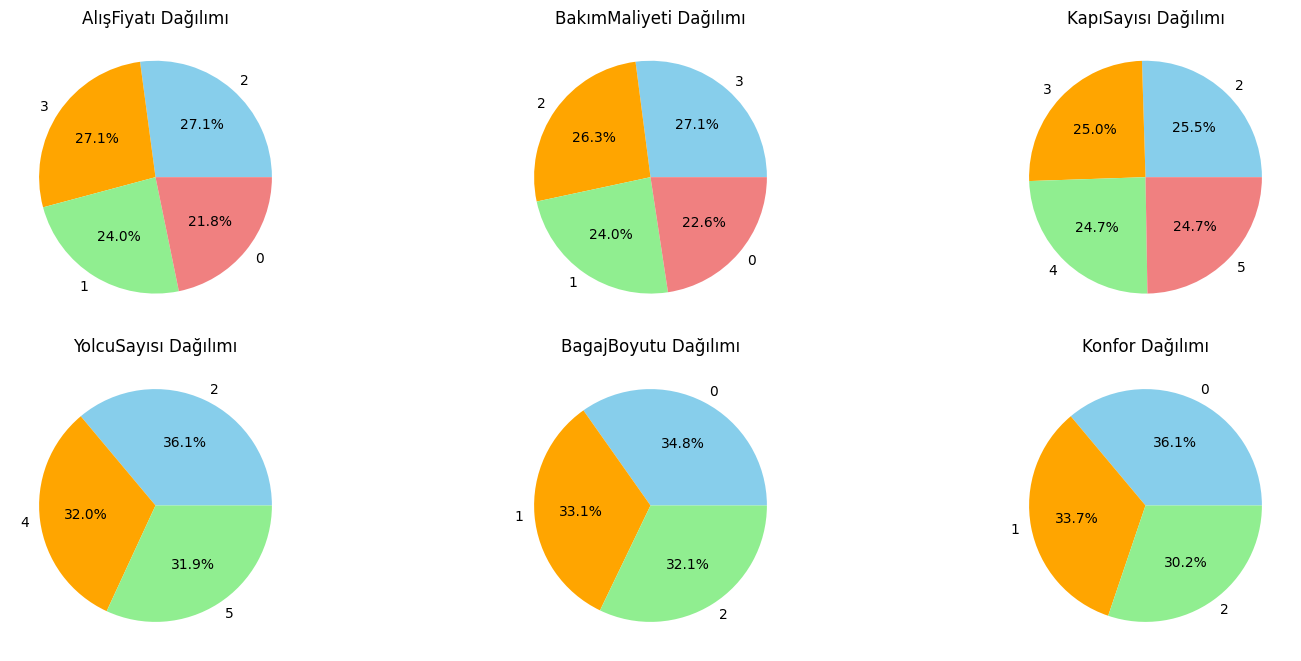

In [9]:
# Birden fazla sütunun dağılımını gösteren daire grafikleri oluşturma
columns = ['AlışFiyatı', 'BakımMaliyeti', 'KapıSayısı', 'YolcuSayısı', 'BagajBoyutu', 'Konfor']
num_plots = len(columns)
num_cols = 3
num_rows = num_plots // num_cols + 1

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols, i)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
    plt.title(f'{column} Dağılımı')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Bağımsız değişkenler (X) ve bağımlı değişken (y) seçimi
X = data[['AlışFiyatı', 'BakımMaliyeti', 'KapıSayısı', 'YolcuSayısı', 'BagajBoyutu']]
y = data['Karar']

# Veri setini eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitim
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Modelin performansını test etme
y_pred = model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)

print("Model accuracy:", accuracy1)

Model accuracy: 0.7272727272727273


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Veri setinde bağımsız değişkenler (X) ve hedef değişken (y) belirleme
X = data[['AlışFiyatı', 'KapıSayısı', 'YolcuSayısı', 'BagajBoyutu', 'Konfor']]
y = data['Karar']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modeli oluşturma *----* Veri kümesindeki özelliklerin değerlerine göre ardışık kararlar alarak verileri sınıflandıran veya regresyon yapabilen bir makine öğrenimi modelidir.
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# k-NN modeli oluşturma *----* Sınıflandırma problemleri için, KNN algoritması, bir veri noktasının etiketini belirlemek için en yakın komşularının etiketlerini kullanır ve sınıflar arasında bir çoğunluk oylaması yapar. 
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Modelleri kullanarak tahminler yapma (opsiyonel)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Karar ağacı modelinin doğruluk puanını hesaplama
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Karar Ağacı Modeli Doğruluk Puanı:", accuracy_decision_tree)

# k-NN modelinin doğruluk puanını hesaplama
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Modeli Doğruluk Puanı:", accuracy_knn)

Karar Ağacı Modeli Doğruluk Puanı: 0.8463949843260188
k-NN Modeli Doğruluk Puanı: 0.8620689655172413


In [12]:
from sklearn.svm import SVC

# Veri setinde bağımsız değişkenler (X) ve hedef değişken (y) belirleme
X = data[['BakımMaliyeti', 'KapıSayısı', 'YolcuSayısı', 'BagajBoyutu', 'Konfor']]
y = data['Karar']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modeli oluşturma *---* SVM bir veri kümesini sınıflara ayırmak için bir hipers düzlem oluşturur. Sınıflar arasındaki en geniş marjı elde etmeyi hedefleyerek, bu hipers düzlemi optimize eder.
svm_model = SVC(kernel='linear', random_state=42)  # Lineer çekirdek kullanıyoruz
svm_model.fit(X_train, y_train)

# Modeli kullanarak tahminler yapma (opsiyonel)
y_pred_svm = svm_model.predict(X_test)

# SVC modelinin doğruluk puanını hesaplama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Modeli Doğruluk Puanı:", accuracy_svm)

SVM Modeli Doğruluk Puanı: 0.8620689655172413


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Bağımsız değişkenler (X) ve hedef değişken (y) seçimi
X = data.drop('Karar', axis=1)
y = data['Karar']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model seçimi ve eğitimi
model = LogisticRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred) #Doğru tahmin edilen veri noktalarının oranını ifade eder.
precision = precision_score(y_test, y_pred) #Pozitif olarak tahmin edilen veri noktalarının gerçekten pozitif olanların oranını ifade eder.
recall = recall_score(y_test, y_pred) #Gerçekten pozitif olan veri noktalarının ne kadarının pozitif olarak tahmin edildiğini ifade eder.
f1 = f1_score(y_test, y_pred) #Hassasiyet ve duyarlılığın harmonik ortalamasıdır. Dengelenmiş bir performans ölçüsü sağlar.

# Sonuçları yazdırma
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.890282131661442
Precision: 0.8064516129032258
Recall: 0.684931506849315
F1 Score: 0.7407407407407408


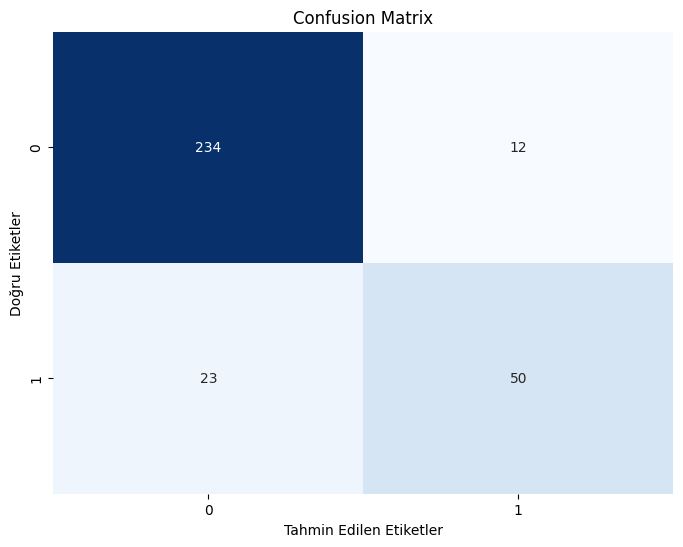

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix hesaplama *---* Sınıflandırma modelinin performansını değerlendirmek için kullanılan bir metriktir. Gerçek değerler ile model tarafından yapılan tahminler arasındaki ilişkiyi görselleştirir.
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile confusion matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Doğru Etiketler')
plt.title('Confusion Matrix')
plt.show()

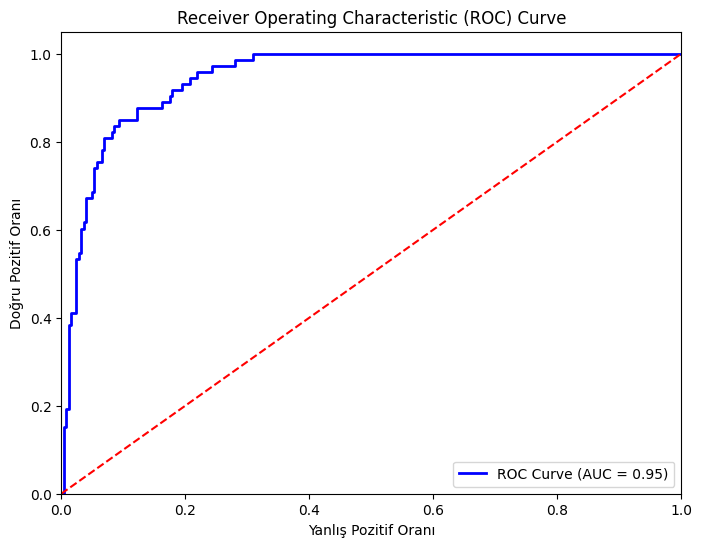

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Tahmin olasılıklarını alın
y_proba = model.predict_proba(X_test)[:, 1]

# Modelin farklı kesme noktalarında (thresholds) duyarlılık ve özgüllük performansını gösterir. 
fpr, tpr, _ = roc_curve(y_test, y_proba)

# ROC eğrisinin altında kalan alanı (AUC) hesaplama
auc = roc_auc_score(y_test, y_proba)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

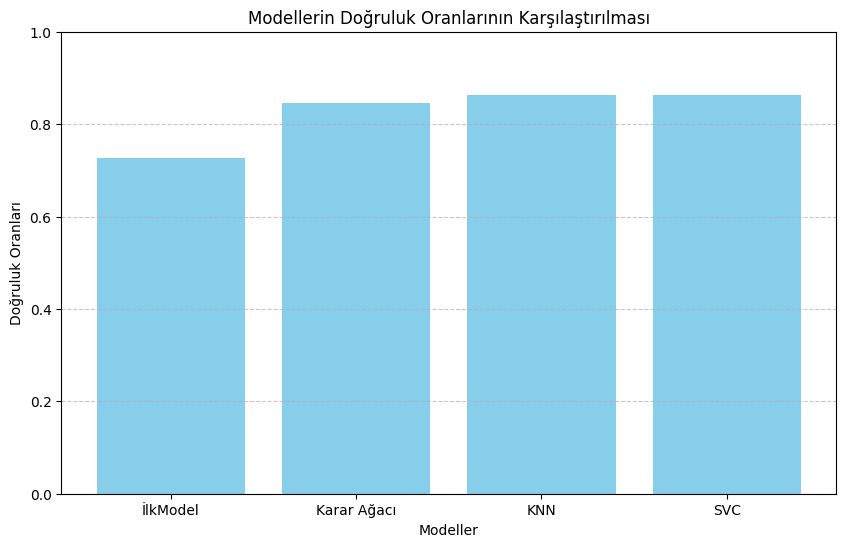

In [16]:
import matplotlib.pyplot as plt

# Modellerin isimleri ve doğruluk oranları
models = ['İlkModel', 'Karar Ağacı', 'KNN','SVC']
accuracies = [accuracy1,accuracy_decision_tree, accuracy_knn, accuracy_svm]  # Doğruluk oranları burada olmalı

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Oranları')
plt.title('Modellerin Doğruluk Oranlarının Karşılaştırılması')
plt.ylim(0.0, 1.0)  # Doğruluk oranlarının aralığı 0 ile 1 arasında olduğu için
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
